In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "32"

In [130]:
from graph_tool.all import *
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.covariance import LedoitWolf, OAS
#import matplotlib.pyplot as py
#import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [94]:
def filterByEdge(g, corr, cutOff, keepOnlyMain):
    # Filtering edges
    corr = g.edge_properties[corr]
    sign = g.new_ep("bool", True)
    sign.a = np.array(corr.a > cutOff)

    tv = GraphView(g, efilt=sign)

    # Keeping largest component
    if keepOnlyMain:
        comp, hist = label_components(tv)
        main_component = tv.new_vp("bool", (comp.a == np.where(hist == max(hist))[0][0]))
        tv.vertex_properties["main_component"] = main_component
        tv.set_vertex_filter(main_component)
    return tv

In [195]:
g = {'body': load_graph("VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21_regularized_correlations_precisions_spearman_correlation_cutoff_0.1.xml.gz"), 
     'head': load_graph("VOOMCounts_CPM5_counts4M_covfree_head_ctrl_onlygenesinmainchr_Jul20.21_regularized_correlations_precisions_spearman_correlation_cutoff_0.1.xml.gz")}

body
pearson
correlation


<ipython-input-214-0da985d396e4>:20: RuntimeWarning: invalid value encountered in double_scalars
  density[i] = E/Et


spearman
head
pearson
correlation


<ipython-input-214-0da985d396e4>:20: RuntimeWarning: invalid value encountered in double_scalars
  density[i] = E/Et


spearman


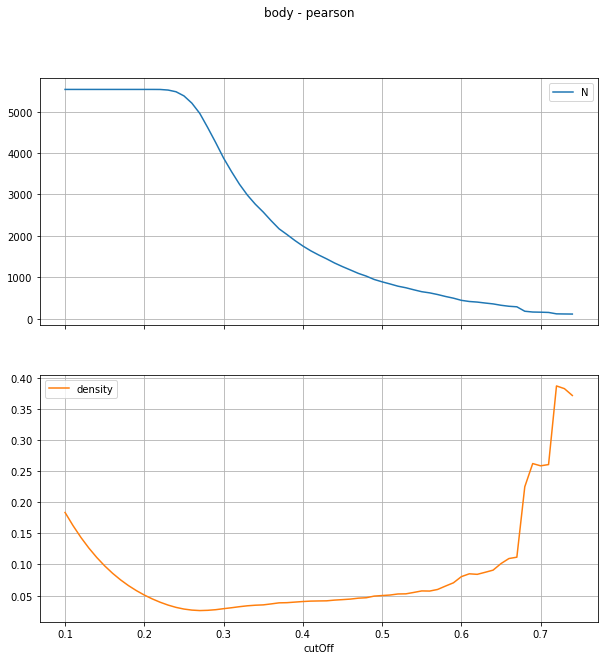

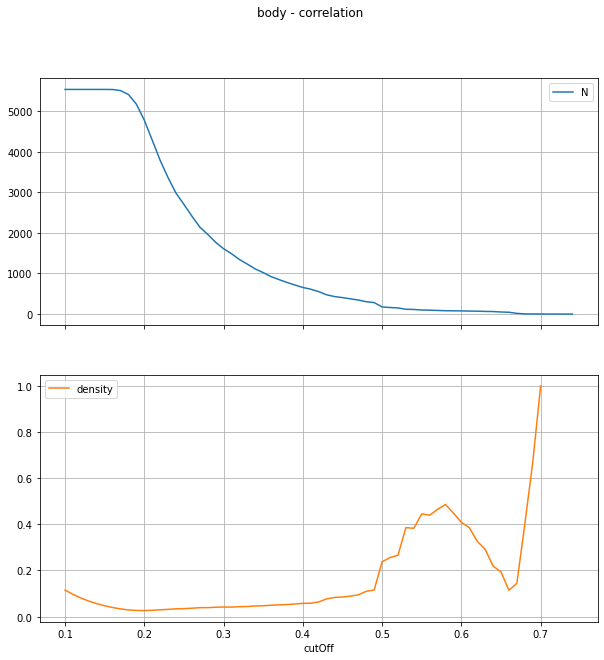

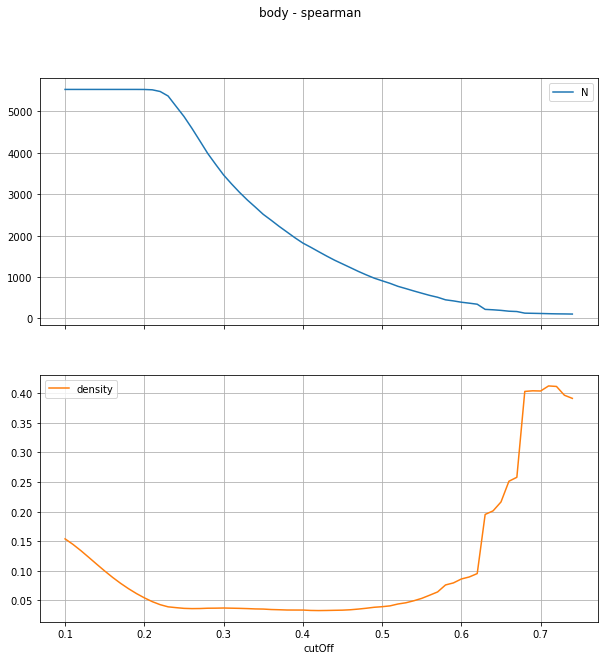

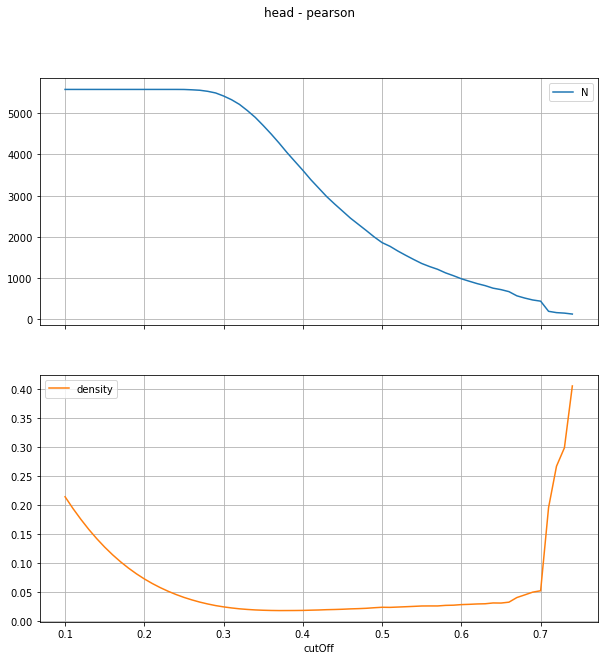

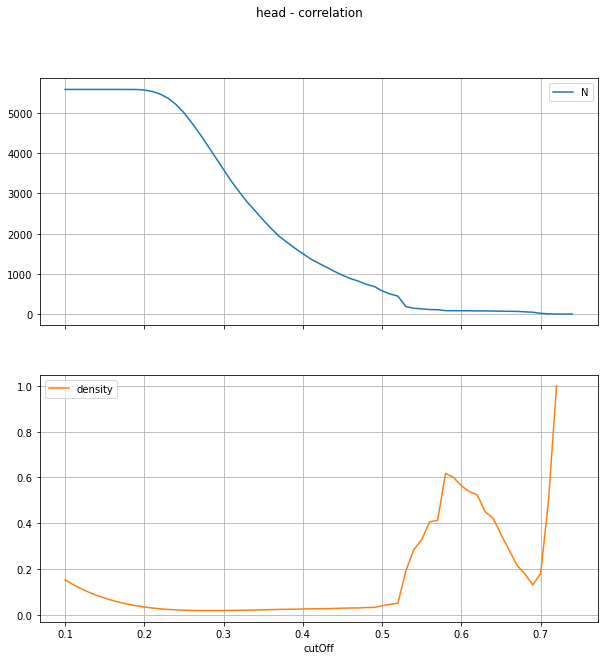

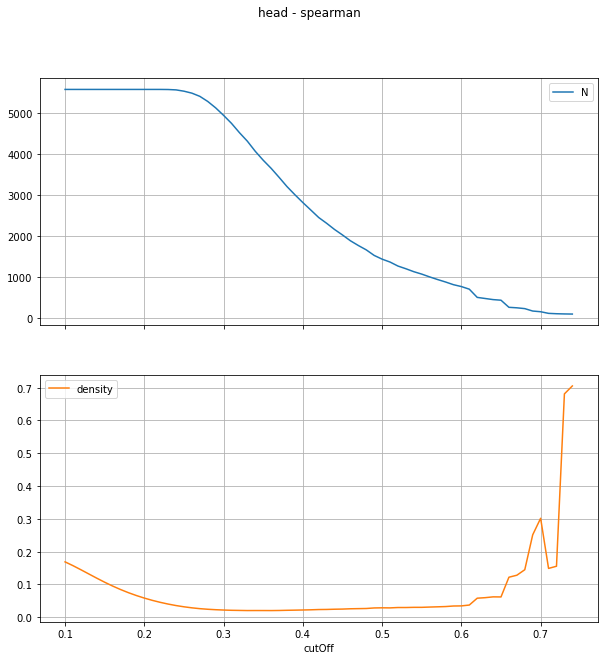

In [214]:
plt.rcParams["figure.figsize"] = [10, 10]

cut_off_array = np.arange(0.1, 0.75, 0.01)

corrs = ['pearson', 'correlation', 'spearman']
tissues = ['body', 'head']

for tissue in tissues:
    print(tissue)
    for corr in corrs:
        print(corr)
        N = np.zeros(len(cut_off_array))
        density = np.zeros(len(cut_off_array))
        for i, cut_off in enumerate(cut_off_array):
            tv = filterByEdge(g[tissue], corr, cut_off, True)

            N[i] = len(tv.get_vertices())
            Et = (N[i] * N[i] - N[i])/2
            E = len(tv.get_edges())
            density[i] = E/Et

#             if(int(cut_off*100) % 5 == 0):
#                 print(str(int(cut_off*100)/100), end = " ")
#                 plot_file  = "../data/output/SBM/edgeCutOff/" + corr + "/" + tissue + "_cutOff-"+ str(int(cut_off*100)/100) +".png"
#                 graph_draw(tv, 
#                            vertex_text=tv.vertex_index, 
#                            edge_pen_width=tv.edge_properties[corr], output = plot_file)
#         print('\n', end = "")
        df = pd.DataFrame({
           'cutOff' : cut_off_array,
           'N': N,
           'density': density})
        df.to_csv("../data/output/SBM/edgeCutOff/" + corr + "/" + tissue + "_cutOff_Ngenes_density.csv")
        n_plot = "../data/output/SBM/edgeCutOff/" + corr + "/" + tissue + "_cutOff_by_Ngenes-Density.png"
        ax = df.plot.line(x = 'cutOff', subplots = True, grid = True, title = tissue + " - " + corr)
        ax[0].figure.savefig(n_plot)
        ax

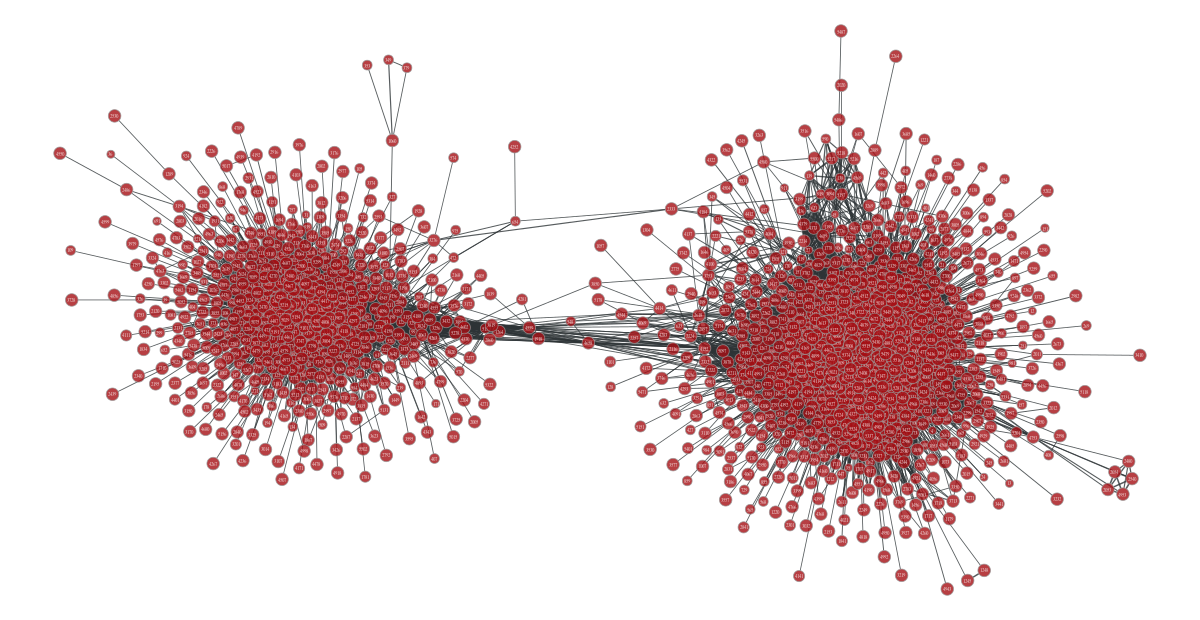

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4419b233a0, at 0x7f4419438ca0>

In [216]:
tv = filterByEdge(g['body'], "spearman", 0.4, True)
graph_draw(tv, vertex_text=tv.vertex_index, edge_pen_width=tv.edge_properties["spearman"])

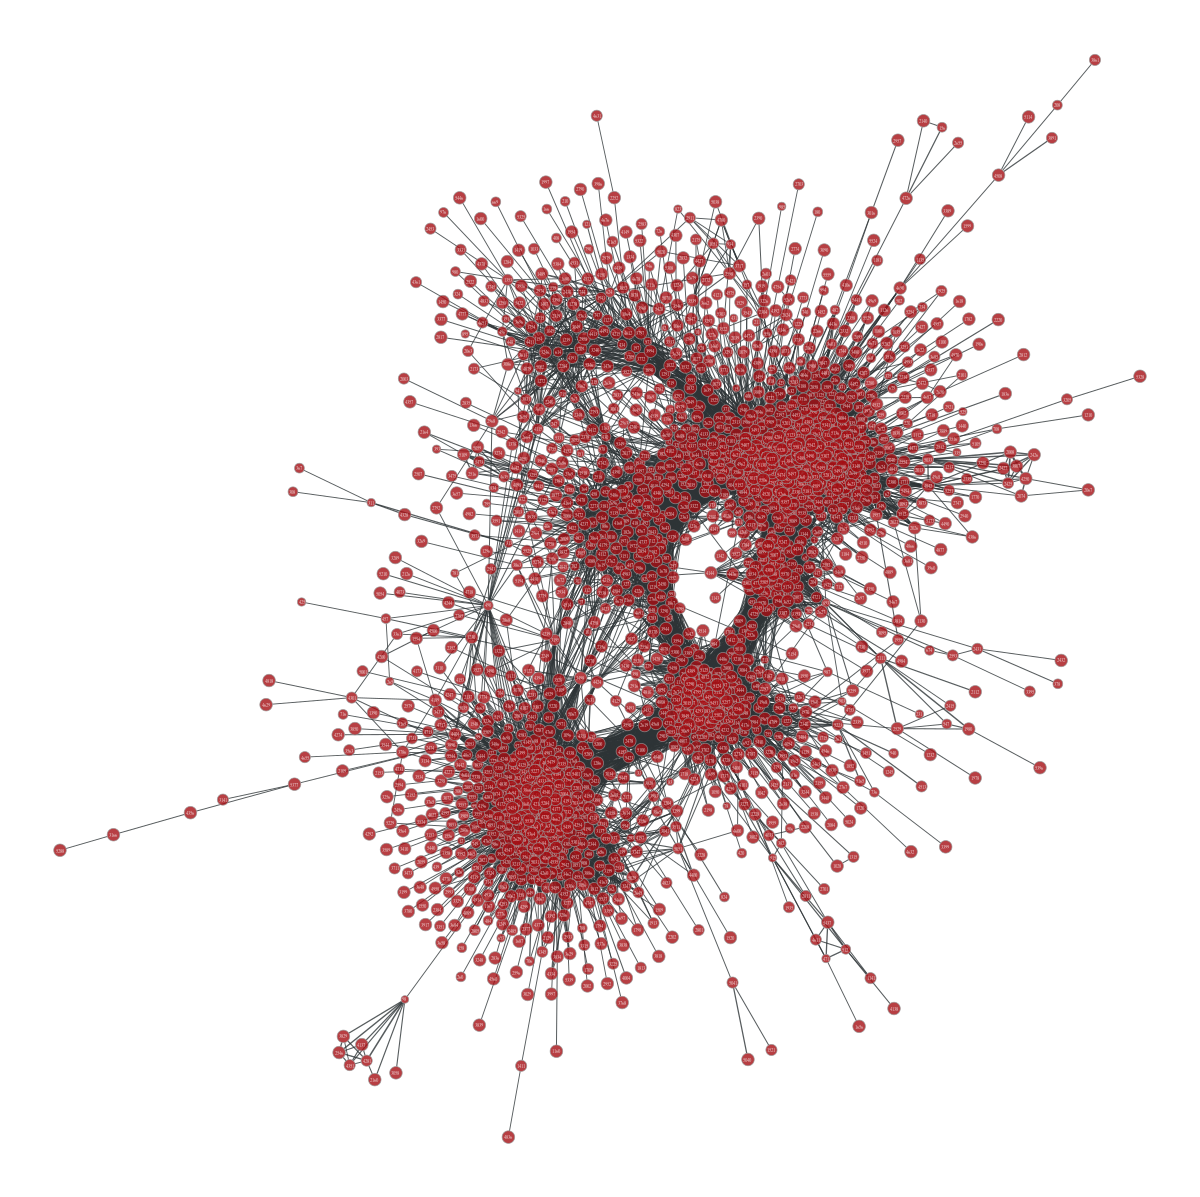

2022

In [221]:
tv = filterByEdge(g['head'], "spearman", 0.45, True)
graph_draw(tv, vertex_text=tv.vertex_index, edge_pen_width=tv.edge_properties["spearman"])
len(tv.get_vertices())

In [222]:
gc = Graph(tv, prune=True)

In [223]:
gc

<Graph object, undirected, with 2022 vertices and 49926 edges, 2 internal vertex properties, 5 internal edge properties, at 0x7f44199efa00>

In [40]:
gene_list = []
for i in gf.vertex_properties['genes']:
    gene_list.append(i)
gene_expr_body.T[gene_list].T.to_csv("../data/VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21_filtered_by_correlation-0.3.csv")